In [1]:
import pandas as pd
import numpy as np

In [2]:
#Dengesiz veriseti ne demek ? 

In [3]:
import seaborn as sns

In [4]:
#1000 data var ama 100 tanesi kanser diğerleri iyi durumda bu durumda çıkarılan model iyi bir sonuç sağlayacak mı ?

In [5]:
np.random.seed(42)

set1no = 900
set2no = 100

In [10]:
df1 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0,scale=1,size=set1no),
    "featur_2":  np.random.normal(loc=0,scale=1,size=set1no),
    "target":    [0] * set1no})


df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0,scale=1,size=set2no),
    "featur_2":  np.random.normal(loc=0,scale=1,size=set2no),
    "target":    [1] * set2no})

In [11]:
df1.head()

feature_1  featur_2  target
0  -0.863494 -0.391877       0
1  -0.031203 -1.017764       0
2   0.018017 -1.027404       0
3   0.472630 -0.373268       0
4  -1.366858  0.644518       0

In [12]:
df2.head()

feature_1  featur_2  target
0   0.295233 -0.070220       1
1  -0.238234 -2.522278       1
2  -0.410518 -0.151967       1
3   1.818899  1.060144       1
4   1.177185 -0.893746       1

In [15]:
df = pd.concat([df1, df2]).reset_index(drop=True)


In [16]:
df

feature_1  featur_2  target
0    -0.863494 -0.391877       0
1    -0.031203 -1.017764       0
2     0.018017 -1.027404       0
3     0.472630 -0.373268       0
4    -1.366858  0.644518       0
..         ...       ...     ...
995   1.006730  0.171469       1
996  -1.571152  1.152648       1
997   1.081514 -1.217404       1
998   0.037542  0.467950       1
999   1.091805 -1.170281       1

[1000 rows x 3 columns]

In [18]:
df["target"].unique()

array([0, 1])

In [20]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [21]:
#upsampling -> upsample minoraty

In [22]:
#downsampling -> downsample majority

In [24]:
#Upsampling

In [54]:
df_minority = df[df["target"]==1]

In [55]:
df_minority

feature_1  featur_2  target
900   0.295233 -0.070220       1
901  -0.238234 -2.522278       1
902  -0.410518 -0.151967       1
903   1.818899  1.060144       1
904   1.177185 -0.893746       1
..         ...       ...     ...
995   1.006730  0.171469       1
996  -1.571152  1.152648       1
997   1.081514 -1.217404       1
998   0.037542  0.467950       1
999   1.091805 -1.170281       1

[100 rows x 3 columns]

In [56]:
df_majority = df[df["target"]==0]

In [57]:
df_majority

feature_1  featur_2  target
0    -0.863494 -0.391877       0
1    -0.031203 -1.017764       0
2     0.018017 -1.027404       0
3     0.472630 -0.373268       0
4    -1.366858  0.644518       0
..         ...       ...     ...
895  -0.009845 -0.106194       0
896  -1.688505  3.098299       0
897  -1.120047 -0.258175       0
898   0.670911  0.510124       0
899   0.603791 -0.649365       0

[900 rows x 3 columns]

In [58]:
from sklearn.utils import resample

In [59]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [60]:
df_minority_upsample.shape

(900, 3)

In [61]:
df_minority_upsample

feature_1  featur_2  target
951  -0.470203  0.025385       1
992  -1.399078 -0.998307       1
914  -2.435312 -0.234924       1
971   0.208323  0.000756       1
960   1.243406 -0.812546       1
..         ...       ...     ...
952   0.612332 -0.716573       1
965  -0.599821  0.125901       1
976  -1.617801  1.653310       1
942  -1.493510  0.001110       1
974   1.271065  0.446982       1

[900 rows x 3 columns]

In [62]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [63]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [64]:
df_majority_downsampled = resample(df_majority,replace=True,n_samples=len(df_minority),random_state=42)

In [65]:
df_majority_downsampled

feature_1  featur_2  target
102   1.351073 -1.795643       0
435   0.695864 -0.497962       0
860  -0.475795  0.029431       0
270  -0.132137  0.309895       0
106  -0.294243  1.048483       0
..         ...       ...     ...
201  -1.090208  0.501685       0
269   0.929410 -1.128063       0
862  -0.687014 -0.981326       0
815  -0.247752 -0.425756       0
270  -0.132137  0.309895       0

[100 rows x 3 columns]

In [66]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [70]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [71]:
#Smote synthetic minority over-sampling

In [72]:
df

feature_1  featur_2  target
0    -0.863494 -0.391877       0
1    -0.031203 -1.017764       0
2     0.018017 -1.027404       0
3     0.472630 -0.373268       0
4    -1.366858  0.644518       0
..         ...       ...     ...
995   1.006730  0.171469       1
996  -1.571152  1.152648       1
997   1.081514 -1.217404       1
998   0.037542  0.467950       1
999   1.091805 -1.170281       1

[1000 rows x 3 columns]

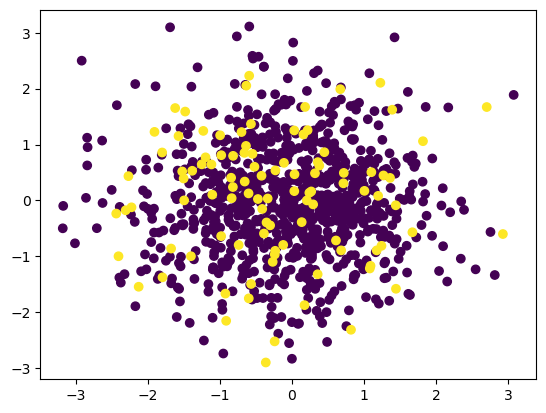

In [77]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"],df["featur_2"],c=df["target"])

In [80]:
%pip install imblearn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
oversample = SMOTE()

In [85]:
(X, y) = oversample.fit_resample(df[["feature_1", "featur_2"]], df["target"])


In [86]:
X

feature_1  featur_2
0     -0.863494 -0.391877
1     -0.031203 -1.017764
2      0.018017 -1.027404
3      0.472630 -0.373268
4     -1.366858  0.644518
...         ...       ...
1795  -0.428956 -0.119457
1796   0.137316  0.513047
1797  -2.256943 -0.145068
1798   0.096517  0.107389
1799  -0.115528  0.508239

[1800 rows x 2 columns]

In [87]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [89]:
type(X)

pandas.core.frame.DataFrame

In [90]:
oversample_df  = pd.concat([X,y],axis=1)

In [93]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

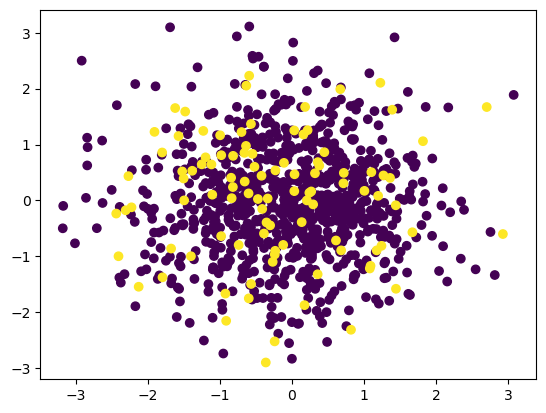

In [94]:
plt.scatter(df["feature_1"],df["featur_2"],c=df["target"])

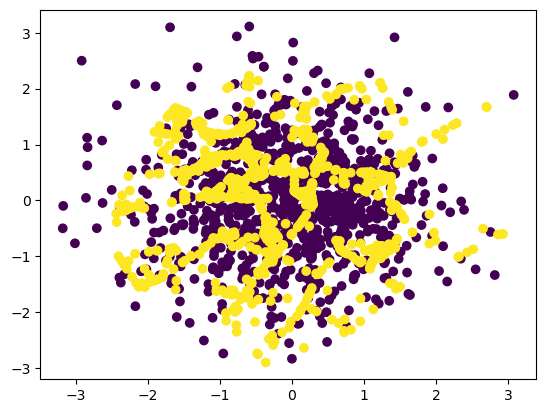

In [96]:
plt.scatter(oversample_df["feature_1"],oversample_df["featur_2"],c=oversample_df["target"]) #Benczerini oluştudu

In [97]:
#Encoding method

In [ ]:
#encoding renkler olan bir kolon olsun elimde 